In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Exercice 1 : Un petit échauffement rapide. . .

Vous disposez d’un jeu de données caractérisant des fruits. Vous disposez:
— etiquette_fruit: son label (numéro associé au nom)
— nom_fruit: son nom
— poids
— largeur
— hauteur
— score-couleur: un score calculé à partir des couleurs observées.

#### Q1. Récupérez le jeu données data_mm_fruits.csv et chargez-le dans un dataframe.

In [86]:
fruits = pd.read_csv('./tp_mm_06_res/data_mm_fruits.csv')

#### Q2. Séparez les données en ensemble d’entraînement et de tests. N’utilisez que le poids, la largeur et la hauteur.

In [87]:
# fruits_train = fruits

# train_indexes= np.random.randint(len(fruits), size=int(len(fruits)*0.8))
# train_fruits = fruits.iloc[train_indexes]

# test_fruits = fruits.diff(train_fruits)
# test_fruits = fruits.merge(train_fruits, how="outer", indicator=True).query('_merge=="left_only"').drop('_merge', axis=1)

# cond = fruits[].isin(train_fruits)
# test_fruits = fruits.merge(train_fruits, how='left')

# df1[~df1.isin(df2)].dropna()
# train_fruits
# test_fruits
# train_fruits

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(fruits[['poids', 'largeur', 'hauteur']], fruits['etiquette_fruit'], train_size=0.8)

xtrain


,poids,largeur,hauteur
78,152.82,8.20,6.96
3,107.53,8.03,6.95
28,99.24,7.57,7.12
36,106.24,7.73,6.95
87,119.57,8.78,4.99
...,...,...,...
51,117.89,8.86,7.66
46,116.28,8.00,6.24
75,77.65,5.32,7.64
5,109.56,7.47,5.55


#### Q3. Affichez les données selon le poids, la taille et la hauteur, par nom, afin de voir si des familles émergent. Pour cela, le module mpl_toolkits.mplot3d import Axes3D peut s’avérer utile

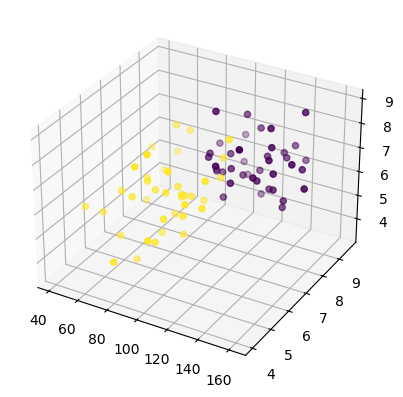

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xtrain['poids'], xtrain['largeur'], xtrain['hauteur'], c=ytrain)

#### Q4. On peut voir différentes familles se dessiner. Un modèle de prédiction par similarité semble être une bonne piste. Entraînez un modèle K-Nearest Neighbors avec d’abord un voisinage de 1, puis avec un voisinage de 5. Vérifiez l’augmentation de la précision du modèle qui doit théoriquement suivre l’élargissement du voisinage.

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# pour l’entrainement
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

pred = knn.predict(fruits[['poids', 'largeur', 'hauteur']])

print(sklearn.metrics.classification_report(fruits['etiquette_fruit'], pred))


              precision    recall  f1-score   support

           1       0.85      0.90      0.87        50
           2       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



#### Q5. Voici une nouvelle observation: [20,4.3,5.5]. Utilisez votre modèle pour prédire le type de fruits correspondant.

In [90]:
pred = knn.predict(pd.DataFrame(data=[[20,4.3,5.5]], columns=['poids', 'largeur', 'hauteur']))

print(pred)

[2]


## Exercice 2 : Reconnaissance de caractères

Un jeu de données très célèbre est l’ensemble MNIST. Il est constitué d’un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L’objectif de ce jeu de données était de permettre à un ordinateur d’apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple).
Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme.
Afin d’utiliser ce jeu de données, le préambule suivant est nécessaire:

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml(’mnist_784’, version=1)
```

On accède aux données via un .data et au résultat de classification via un .target.

#### Q1. Premières manipulations.

#### Q1.1. Chargez le dataset en mémoire et affichez sa taille.

In [91]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

mnist_df = mnist.data

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Q1.2. Récupérez les données liées au 42ème caractère, reconstituez l’image et affichez-la grâce à la méthode plt.imshow(..., cmap=plt.cm.gray, interpolation=’nearest’). L’option d’interpolation sert juste à lisser l’affichage alors que l’option cmap spécifie un affichage en niveaux de gris. Vous devriez obtenir l’image suivante:

TypeError: Image data of dtype object cannot be converted to float

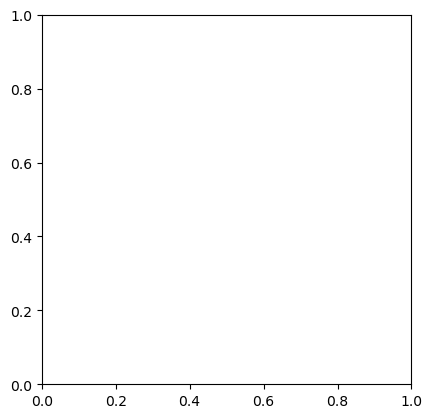

In [92]:
row_42 = mnist_df.iloc[[42]]

image_matrix = row_42.to_numpy().reshape(28, 28)

plt.imshow(image_matrix, cmap=plt.cm.gray, interpolation='nearest')